# Gráficos padronizados em ggplot2
## Bibliotecas


In [1]:
library(ggplot2)
library(scales)

## Plotagem de gráficos de linhas

In [2]:
plot.series <- function(series, label_series=" ", label_x="x", label_y="y", colors=NULL) {
  grf <- ggplot(data=series, aes(x = x, y = value, colour=variable))
  grf <- grf + geom_line() + geom_point(data=series, aes(x = x, y = value, colour=variable), size=0.5)
  if (!is.null(colors)) {
    grf <- grf + scale_color_manual(values=colors)
  }
  grf <- grf + labs(color=label_series)
  grf <- grf + xlab(label_x)
  grf <- grf + ylab(label_y) 
  grf <- grf + theme_bw(base_size = 10)
  grf <- grf + theme(panel.grid.major = element_blank()) + theme(panel.grid.minor = element_blank()) 
  grf <- grf + theme(legend.position = "bottom") + theme(legend.key = element_blank()) 
  return(grf)
}

## Plotagem de gráficos boxplot

In [3]:
plot.boxplot <- function(series, labx = "x", laby = "y", colors = NULL) {
  grf <- ggplot(aes(y = value, x = variable), data = series)
  if (!is.null(colors)) {
    grf <- grf + geom_boxplot(color = colors)
  }
  else {
    grf <- grf + geom_boxplot()
  }
  grf <- grf + theme_bw(base_size = 10)
  grf <- grf + theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")
  grf <- grf + xlab(labx)
  grf <- grf + ylab(laby)
  return(grf)
}

## Plotagem de gráficos de barra

In [4]:
plot.bar <- function(series, labx="class", laby="y", group=NULL, colors=NULL) {
  if (!is.null(group)) {
    grf <- ggplot(series, aes(x, value, fill=variable)) + geom_bar(stat = "identity",position = "dodge")
    if (!is.null(colors)) {
      grf <- grf + scale_fill_manual("legend", values = colors)
    }
  }
  else {  
    grf <- ggplot(series, aes(variable, value))
    if (!is.null(colors)) {
      grf <- grf + geom_bar(stat = "identity",fill=colors)
    }
    else {  
      grf <- grf + geom_bar(stat = "identity")
    }    
  }
  grf <- grf + theme_bw(base_size = 10)
  grf <- grf + theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")
  grf <- grf + scale_x_discrete(limits = unique(series$class))
  return(grf)
}

## Plotagem de gráficos de stacked-bar

In [5]:
plot.stackedbar <- function(series, labx="class", laby="y", colors=NULL) {
  grf <- ggplot(series, aes(x=x, y=value, fill=variable)) + geom_bar(stat="identity", colour="white")
  if (!is.null(colors)) {
    grf <- grf + scale_fill_manual("legend", values = colors)
  }
  grf <- grf + theme_bw(base_size = 10)
  grf <- grf + theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")
  grf <- grf + scale_x_discrete(limits = unique(series$class))
  return(grf)
}

## Datasets de exemplos

In [6]:
library(reshape)

mycolors=c("darkblue", "darkgreen", "darkred", "orange", "purple")

dataset_series <- function() {
  series <- data.frame(x= 1:10, sin=sin(1:10), cos=cos(1:10))
  series <- melt(series[,c('x','sin','cos')],id.vars = 1)
  return(series)  
}

dataset_bar <- function() {
  series <- matrix(nrow=5, ncol=2)
  series[1,] = c("janeiro", 10)
  series[2,] = c("fevereiro", 9)
  series[3,] = c("março", 11)
  series[4,] = c("abril", 8)
  series[5,] = c("maio", 12)
  series <- data.frame(variable=as.factor(series[,1]), value=as.double(series[,2]))  
  return(series)
}

dataset_stackedbar <- function() {
  series <- read.table(text = "x Map Reduce 
                          janeiro 10 5
                          fevereiro 9 4
                          março 11 5
                          abril 8 4
                          maio 12 6",header = TRUE,sep = "")  
  series <- melt(series[,c('x','Map','Reduce')],id.vars = 1)
}

## Exemplos

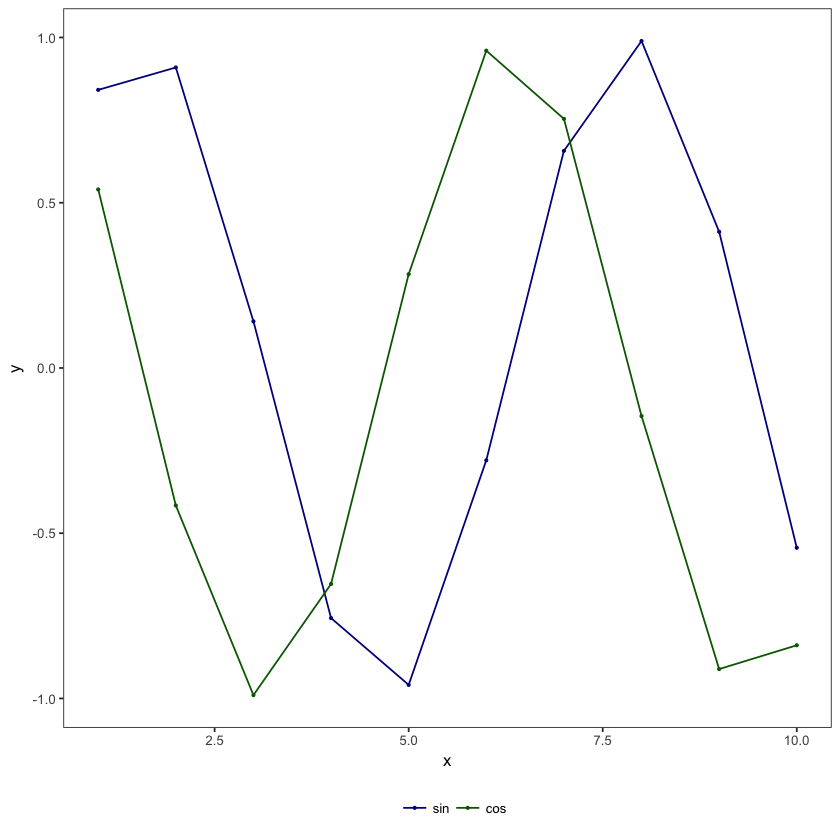

In [7]:
series <- dataset_series()
grf <- plot.series(series,colors=mycolors)
grf
ggsave( "plot_series.pdf", width = 5.5, height = 4)

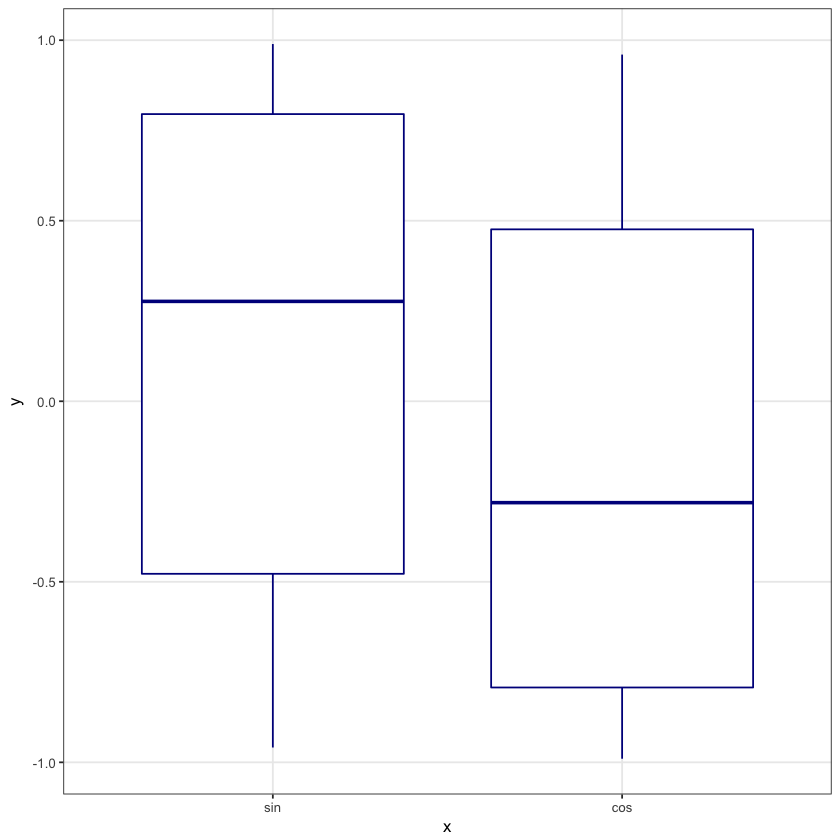

In [8]:
series <- dataset_series()
grf <- plot.boxplot(series, colors=mycolors[1])
grf
ggsave( "plot_boxplot.pdf", width = 5.5, height = 4)

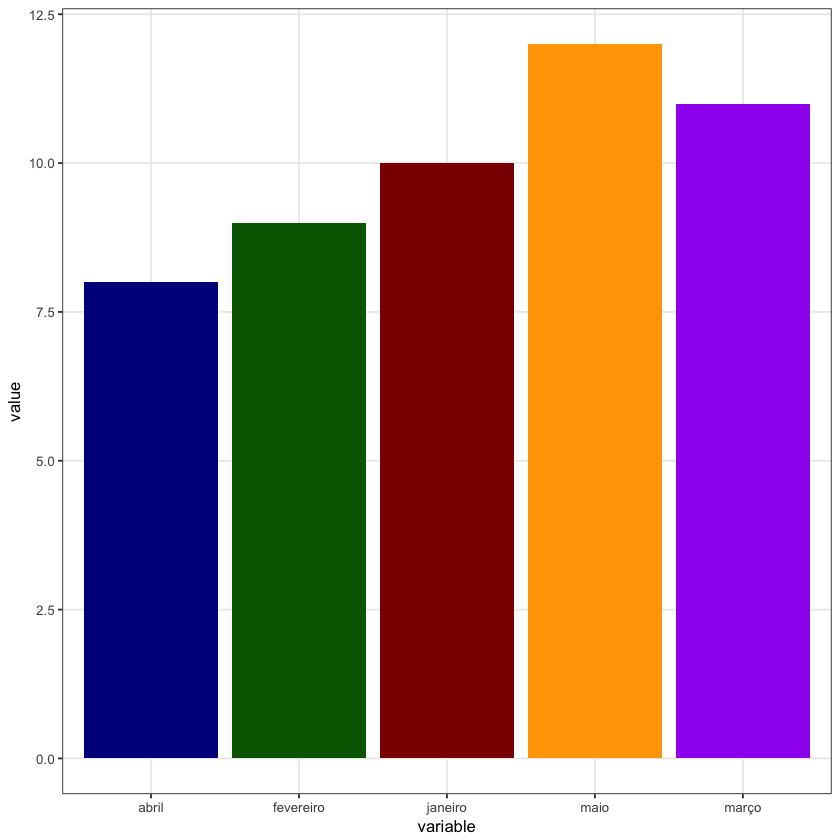

In [9]:
series <- dataset_bar()
grf <- plot.bar(series, colors=mycolors)
grf
ggsave("plot_bar.pdf", width = 5.5, height = 4)

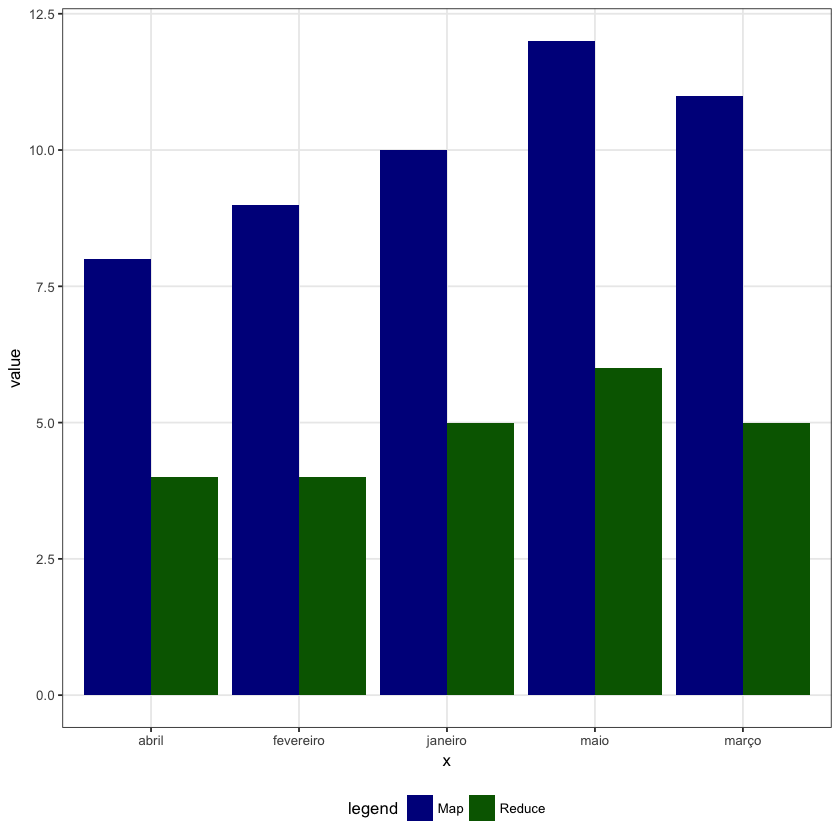

In [10]:
series <- dataset_stackedbar()
grf <- plot.bar(series, group="variable", colors=mycolors)
grf
ggsave("plot_stackedbar.pdf", width = 5.5, height = 4)

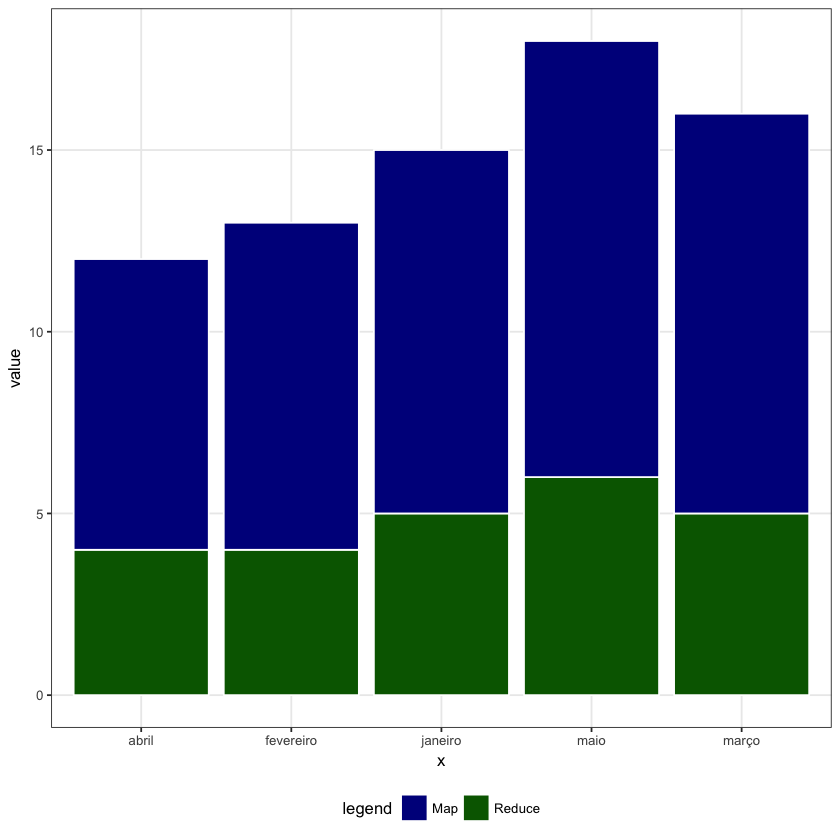

In [11]:
series <- dataset_stackedbar()
grf <- plot.stackedbar(series, colors=mycolors)
grf
ggsave("plot_stackedbar.pdf", width = 5.5, height = 4)